In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/home/ignis/Downloads/foodtruck.csv')

In [4]:
data


,6.1101,17.592
0,5.5277,9.13020
1,8.5186,13.66200
2,7.0032,11.85400
3,5.8598,6.82330
4,8.3829,11.88600
...,...,...
91,5.8707,7.20290
92,5.3054,1.98690
93,8.2934,0.14454
94,13.3940,9.05510


In [5]:
columns=['X','Y']
data.columns=columns

In [6]:
data


,X,Y
0,5.5277,9.13020
1,8.5186,13.66200
2,7.0032,11.85400
3,5.8598,6.82330
4,8.3829,11.88600
...,...,...
91,5.8707,7.20290
92,5.3054,1.98690
93,8.2934,0.14454
94,13.3940,9.05510


In [7]:
Y=data['Y']
X=data['X']

In [22]:
def plot_regression_line(x, y, b):
   
    plt.scatter(x, y, marker = "o", s = 30)
  

    y_pred = b[0] + b[1]*x
  

    plt.plot(x, y_pred, color = "g")

    plt.xlabel('x')
    plt.ylabel('y')
  
   
    plt.show()

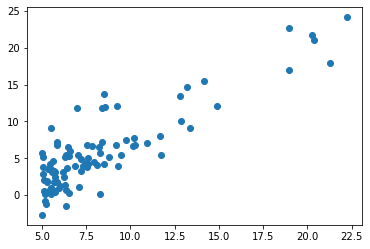

In [21]:
plt.scatter(X,Y)

In [50]:
def calc_coef(X,Y):
    s=np.size(X)
    print(s)
    m_x = np.mean(X)
    m_y = np.mean(Y)
    i=0
    ssxy=0
    ssxx=0
    for i in range(s):
        
        ssxy+=(X[i]-m_x)*(Y[i]-m_y)
        ssxx+=(X[i]-m_x)*(X[i]-m_x)
        
    m=ssxy/ssxx
    
    c=m_y-m*m_x
    print(ssxx)
    print(ssxy)
    
    return (c,m)
        

In [97]:
coeff=calc_coef(X,Y)

96
1433.4508245398956
1739.5603117330625


In [98]:
coeff
print("Value of c  and m are:")
print(coeff[0],coeff[1])

Value of c  and m are:
-4.211504005424096 1.2135472539083585


Green line is predicted Ycap against original X values


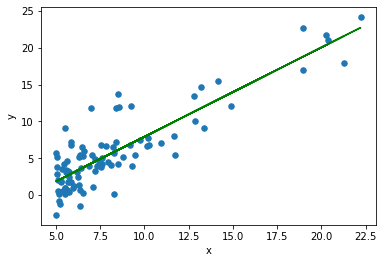

In [99]:
print("Green line is predicted Ycap against original X values")
plot_regression_line(X,Y,coeff)

In [96]:
def y_pred(m,c,X):
   
    s=np.size(X)
    Ycap=[0]*s
    i=0
    for i in range(s):
        Ycap[i]=m*X[i]+c
        
 
    return Ycap

In [63]:
Ycap=y_pred(coeff[1],coeff[0],X)

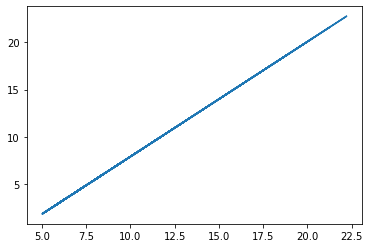

In [95]:
plt.plot(X,Ycap)

In [71]:
print(data.corr())

          X         Y
X  1.000000  0.872157
Y  0.872157  1.000000


In [85]:
def sse(Y,Ycap):
    s=np.size(Y)
    i=0
    sse1=0
    for i in range(s):
        sse1+=(Y[i]-Ycap[i])**2
        
    return sse1
        

In [86]:
def mse(Y,Ycap):
    s=np.size(Y)
    i=0
    sse2=0
    for i in range(s):
        sse2+=(Y[i]-Ycap[i])**2
        
    return sse2/s

In [87]:
sse1=sse(Y,Ycap)
mse1=mse(Y,Ycap)

In [92]:
print("Sum Squared Error")
print(sse1)


Sum Squared Error
664.2397254063366


In [93]:
print("Mean Squared Error")
print(mse1)

Mean Squared Error
6.919163806316006


In [100]:
def rsqr(Y,Ycap):
    s=np.size(Y)
    i=0
    m_y=np.mean(Y)
    ssr=0
    sst=0
    for i in range(s):
        ssr+=(Ycap[i]-m_y)**2
        sst+=(Y[i]-m_y)**2
        
    return ssr/sst
        

In [101]:
print("R squared :")
print(rsqr(Y,Ycap))

R squared :
0.7606583419339856
